# HW1014Q1 CH03Q13

### 13. In this exercise you will create some simulated data and will ft simple linear regression models to it. Make sure to use the default random number generator with seed set to 1 prior to starting part (a) to ensure consistent results.

In [1]:
import numpy as np

np.random.seed(1)

##### (a) Using the normal() method of your random number generator, create a vector, x, containing 100 observations drawn from a N(0, 1) distribution. This represents a feature, X.

In [2]:
x = np.random.normal(0, 1, 100)

##### (b) Using the normal() method, create a vector, eps, containing 100 observations drawn from a N(0, 0.25) distribution—a normal distribution with mean zero and variance 0.25.5.

In [3]:
eps = np.random.normal(0, 0.5 ** 0.5, 100)

##### (c) Using x and eps, generate a vector y according to the model Y = −1+0.5X + e. (3.39) What is the length of the vector y? What are the values of β0 and β1 in this linear model?

In [4]:
y = -1 + 0.5 * x + eps

print("Length of vector y:", len(y))
print("Values of β0 and β1 are -1 and 0.5 respectively.")

Length of vector y: 100
Values of β0 and β1 are -1 and 0.5 respectively.


##### (d) Create a scatterplot displaying the relationship between x and y. Comment on what you observe.

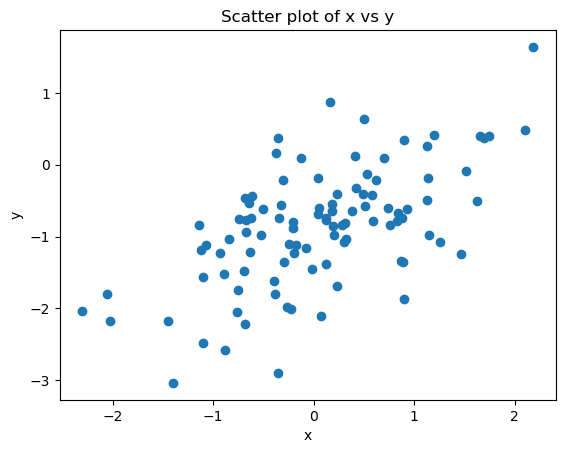

In [5]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x vs y')
plt.show()

##### (e) Fit a least squares linear model to predict y using x. Comment on the model obtained. How do βˆ0 and βˆ1 compare to β0 and β1?

In [6]:
import statsmodels.api as sm

X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
print(model.summary())
print("βˆ0, βˆ1=", model.params)
print("β0, β1= -1, 0.5")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     57.40
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           2.01e-11
Time:                        00:01:16   Log-Likelihood:                -99.781
No. Observations:                 100   AIC:                             203.6
Df Residuals:                      98   BIC:                             208.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8960      0.066    -13.484      0.0

##### (f) Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a diferent color. Use the legend() method of the axes to create an appropriate legend.

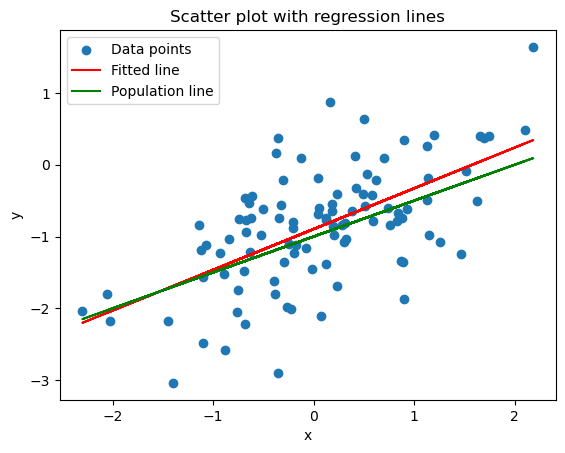

In [7]:
plt.scatter(x, y, label='Data points')
plt.plot(x, model.fittedvalues, color='red', label='Fitted line')
plt.plot(x, -1 + 0.5 * x, color='green', label='Population line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Scatter plot with regression lines')
plt.show()

##### (g) Now fit a polynomial regression model that predicts y using x and x^2. Is there evidence that the quadratic term improves the model fit? Explain your answer.r.

In [8]:
x2 = np.column_stack((x, x ** 2))
X_poly = sm.add_constant(x2)
model_poly = sm.OLS(y, X_poly).fit()
print(model_poly.summary())
print("\nNo. We cannot reject that x^2 equal to 0.")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     28.44
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           1.91e-10
Time:                        00:01:16   Log-Likelihood:                -99.764
No. Observations:                 100   AIC:                             205.5
Df Residuals:                      97   BIC:                             213.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9046      0.082    -11.083      0.0

##### (h) Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term e in (b). Describe your results.

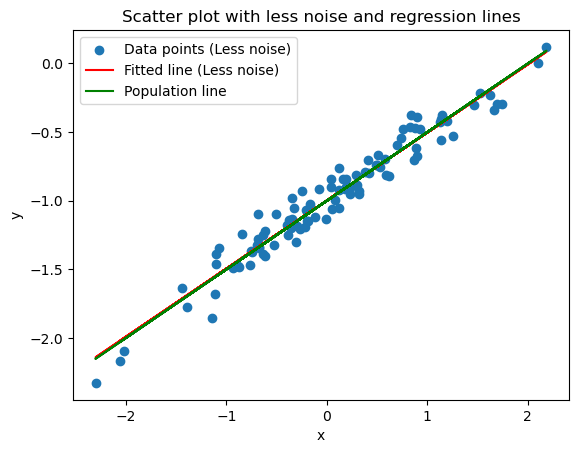

The less noise fitted line is more close to population line.


In [9]:
eps_less_noise = np.random.normal(0, 0.01 ** 0.5, 100)
y_less_noise = -1 + 0.5 * x + eps_less_noise

plt.scatter(x, y_less_noise, label='Data points (Less noise)')
model_less_noise = sm.OLS(y_less_noise, X).fit()
plt.plot(x, model_less_noise.fittedvalues, color='red', label='Fitted line (Less noise)')

plt.plot(x, -1 + 0.5 * x, color='green', label='Population line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Scatter plot with less noise and regression lines')
plt.show()

print("The less noise fitted line is more close to population line.")

##### (i) Repeat (a)–(f) after modifying the data generation process in such a way that there is more noise in the data. The model (3.39) should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term e in (b). Describe your results.

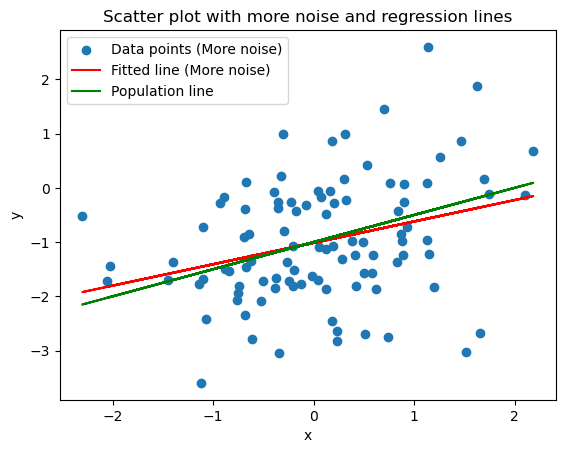

The more noise fitted line is further away from population line.


In [10]:
eps_more_noise = np.random.normal(0, 1 ** 0.5, 100)
y_more_noise = -1 + 0.5 * x + eps_more_noise

plt.scatter(x, y_more_noise, label='Data points (More noise)')
model_more_noise = sm.OLS(y_more_noise, X).fit()
plt.plot(x, model_more_noise.fittedvalues, color='red', label='Fitted line (More noise)')

plt.plot(x, -1 + 0.5 * x, color='green', label='Population line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Scatter plot with more noise and regression lines')
plt.show()

print("The more noise fitted line is further away from population line.")

##### (j) What are the confdence intervals for β0 and β1 based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.

In [11]:
def print_confidence_intervals(y_data, description):
    model_ci = sm.OLS(y_data, X).fit()
    print(f"{description} confidence intervals for β0 and β1:")
    print(model_ci.conf_int())

print_confidence_intervals(y, "Original data")
print_confidence_intervals(y_less_noise, "Less noisy data")
print_confidence_intervals(y_more_noise, "More noisy data")
print("The less noisy data has narrower confidence intervals, and the more noisy data has wider confidence intervals")

Original data confidence intervals for β0 and β1:
[[-1.02791794 -0.76417353]
 [ 0.41884306  0.71611129]]
Less noisy data confidence intervals for β0 and β1:
[[-1.01894809 -0.97859004]
 [ 0.4731502   0.51863806]]
More noisy data confidence intervals for β0 and β1:
[[-1.22700729 -0.80091614]
 [ 0.15422192  0.63447234]]
The less noisy data has narrower confidence intervals, and the more noisy data has wider confidence intervals
